# Análise Exploratória - Acidentes de trânsito no Brasil

<p> Utilizando dados oficiais da policia rodoviaría federal, vamos analisar os dados de acidentes de trânsito no Brasil. </p>

In [1]:
# Instalando bibliotecas
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpys

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Importando bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
import csv

from scipy.stats import chi2_contingency


In [4]:
# Carrega os dados dos acidentes
df_2023 = pd.read_csv('accidents_prf_2023.csv', sep=';', encoding='iso-8859-1',  on_bad_lines='skip', quoting=csv.QUOTE_NONE)
df_2022 = pd.read_csv('accidents_prf_2022.csv', sep=';', encoding='iso-8859-1',  on_bad_lines='skip', quoting=csv.QUOTE_NONE)

df = pd.concat([df_2022, df_2023])
df.head()

,"""id""","""pesid""","""data_inversa""","""dia_semana""","""horario""","""uf""","""br""","""km""","""municipio""","""causa_principal""",...,"""sexo""","""ilesos""","""feridos_leves""","""feridos_graves""","""mortos""","""latitude""","""longitude""","""regional""","""delegacia""","""uop"""
0,405147,911178.0,2022-01-01,"""sábado""","""00:10:00""","""CE""",222.0,"2,8","""FORTALEZA""","""Sim""",...,"""Masculino""",1.0,0.0,0.0,0.0,"-3,73911117","-38,58687498","""SPRF-CE""","""DEL01-CE""","""UOP01-DEL01-CE"""
1,405147,911179.0,2022-01-01,"""sábado""","""00:10:00""","""CE""",222.0,"2,8","""FORTALEZA""","""Sim""",...,"""Masculino""",0.0,0.0,1.0,0.0,"-3,73911117","-38,58687498","""SPRF-CE""","""DEL01-CE""","""UOP01-DEL01-CE"""
2,405149,912796.0,2022-01-01,"""sábado""","""01:30:00""","""PE""",104.0,63,"""CARUARU""","""Sim""",...,"""Feminino""",0.0,1.0,0.0,0.0,"-8,2698","-35,9803","""SPRF-PE""","""DEL02-PE""","""UOP01-DEL02-PE"""
3,405149,912793.0,2022-01-01,"""sábado""","""01:30:00""","""PE""",104.0,63,"""CARUARU""","""Sim""",...,"""Masculino""",0.0,0.0,1.0,0.0,"-8,2698","-35,9803","""SPRF-PE""","""DEL02-PE""","""UOP01-DEL02-PE"""
4,405149,913204.0,2022-01-01,"""sábado""","""01:30:00""","""PE""",104.0,63,"""CARUARU""","""Sim""",...,"""Não Informado""",0.0,0.0,0.0,0.0,"-8,2698","-35,9803","""SPRF-PE""","""DEL02-PE""","""UOP01-DEL02-PE"""


In [5]:
print('Total de Linhas: {}. Total de Colunas: {}' .format(df.shape[0],df.shape[1]))

Total de Linhas: 654413. Total de Colunas: 37


In [6]:
# Filtra o dataframe apenas por registros da região metropolitana de Fortaleza
metropolitan_area = ['"FORTALEZA"', '"CAUCAIA"', '"EUSEBIO"', '"AQUIRAZ"', '"CASCAVEL"', '"CHOROZINHO"', '"HORIZONTE"', '"MARANGUAPE"', '"MARACANAU"', '"PACAJUS"', '"PARACURU"', '"PINDORETAMA"', '"PARAIPABA"', '"SAO GONÇALO DO AMARANTE"', '"SAO LUIZ DO CURU"', '"TRAIRI"']
df = df.loc[df['"municipio"'].isin(metropolitan_area) & df['"uf"'].isin(['"CE"'])]
print(df['"municipio"'].unique())

['"FORTALEZA"' '"CAUCAIA"' '"CHOROZINHO"' '"EUSEBIO"' '"MARACANAU"'
 '"HORIZONTE"' '"AQUIRAZ"' '"CASCAVEL"' '"PACAJUS"' '"MARANGUAPE"']


In [7]:
# Remove "" aspas duplas redundantes do arquivo
df.columns = df.columns.str.replace('"', '')


# Remove as aspas duplas das colunas de uma forma mais eficiente
df = df.applymap(lambda x: x.replace('"', '') if isinstance(x, str) else x)

df.columns = df.columns.str.lower()

columns_to_drop = ['pesid', 'ano_fabricacao_veiculo', 'marca']
columns_to_drop = [col for col in columns_to_drop if col in df.columns]
df = df.drop(columns=columns_to_drop)


# Cria uma coluna com o mês do acidente
df['data_inversa'] = pd.to_datetime(df['data_inversa']).dt.to_period('M')
df['mes'] = df['data_inversa'].dt.strftime('%m')


/tmp/ipykernel_2739/1590008242.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.replace('"', '') if isinstance(x, str) else x)


In [8]:
# Entendendo o dataset
# print(df.shape)
# print(df.head())
print(df.columns)
# print(df.info())

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_principal', 'causa_acidente', 'ordem_tipo_acidente',
       'tipo_acidente', 'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'id_veiculo', 'tipo_veiculo', 'tipo_envolvido', 'estado_fisico',
       'idade', 'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos',
       'latitude', 'longitude', 'regional', 'delegacia', 'uop', 'mes'],
      dtype='object')


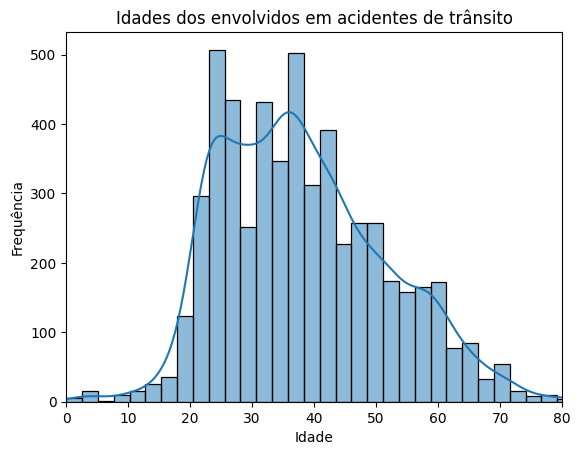

In [38]:
df_filtered = df[df['idade'] <= 100]

# Calcula o número de bins para o histograma
num_bins = int(math.sqrt(len(df_filtered)) / 2)

# Plota o histograma
sns.histplot(df_filtered, x='idade', bins=num_bins, kde=True)

plt.title('Idades dos envolvidos em acidentes de trânsito')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.xlim([0, 80])
plt.show()

Text(0.5, 1.0, 'Acidentes por tipo de veículo')

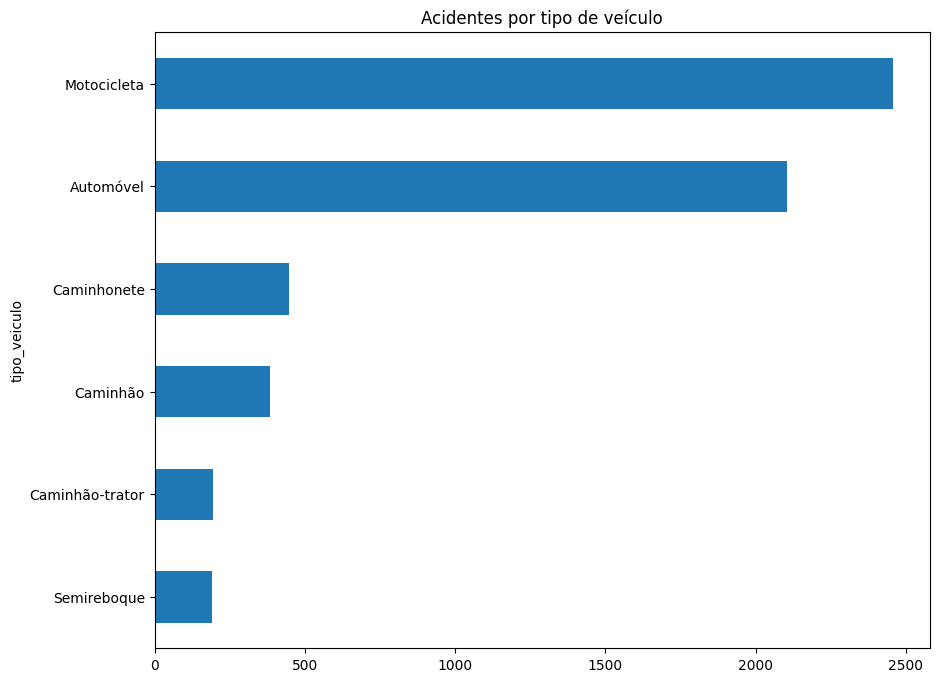

In [25]:
acidentes_por_veiculo = df['tipo_veiculo'].value_counts()
acidentes_por_veiculo = acidentes_por_veiculo.dropna()
acidentes_por_veiculo = acidentes_por_veiculo[acidentes_por_veiculo > 150]
acidentes_por_veiculo = acidentes_por_veiculo.sort_values(ascending=True)
acidentes_por_veiculo.plot(kind='barh', figsize=(10, 8))
plt.title('Acidentes por tipo de veículo')

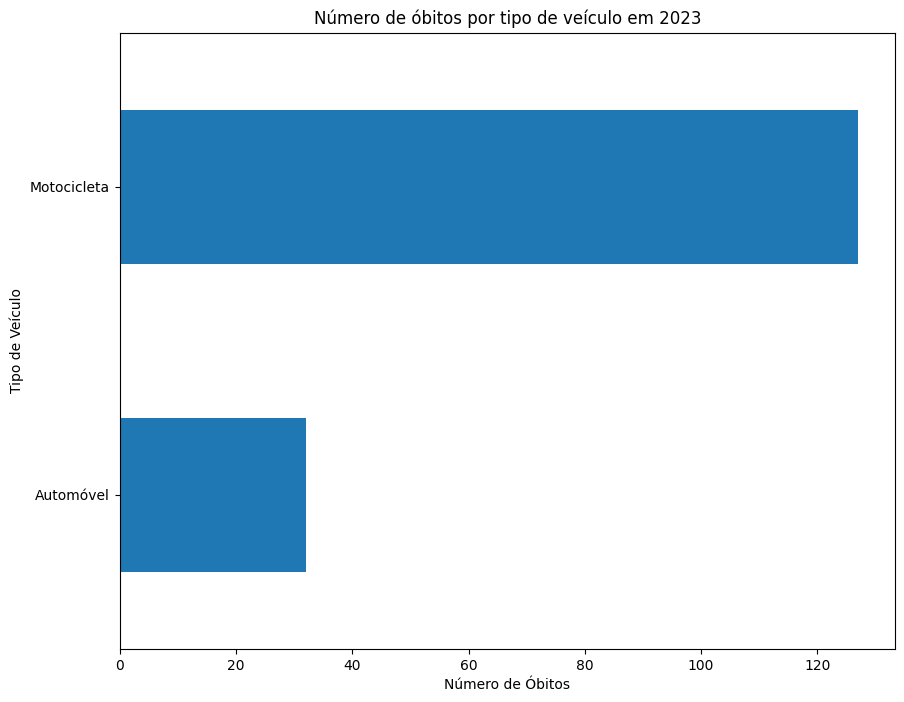

In [26]:
# Agrupa os dados por tipo de veículo e soma o número de óbitos em cada grupo
obitos_por_veiculo = df.groupby('tipo_veiculo')['mortos'].sum()

obitos_por_veiculo = obitos_por_veiculo.sort_values(ascending=True)

obitos_por_veiculo = obitos_por_veiculo[obitos_por_veiculo > 30]
# Plota um gráfico de barras dos dados agrupados
obitos_por_veiculo.plot(kind='barh', figsize=(10, 8))

plt.title('Número de óbitos por tipo de veículo em 2023')
plt.ylabel('Tipo de Veículo')
plt.xlabel('Número de Óbitos')
plt.show()

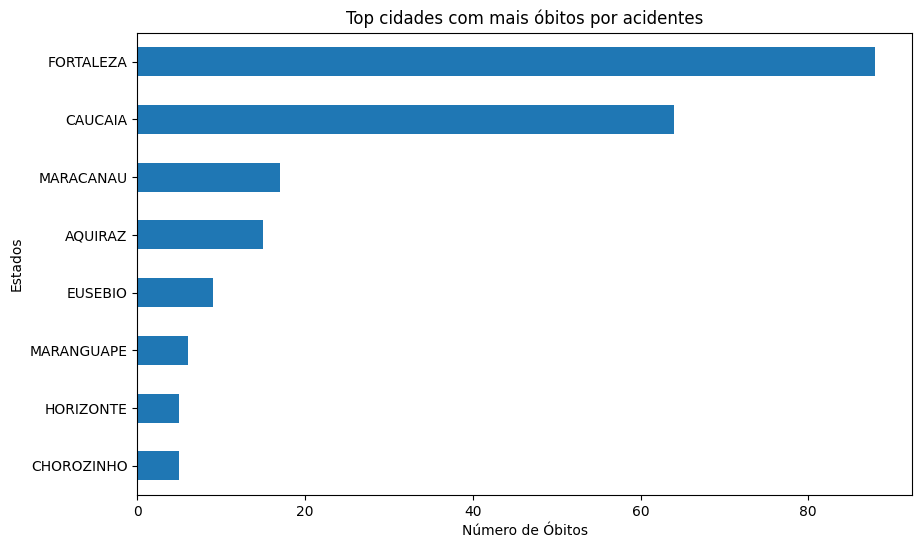

In [28]:
df_filtered = df[df['mortos'] > 0]

# Agrupa os dados por cidade e soma o número de óbitos em cada grupo
obitos_por_estado = df_filtered.groupby('municipio')['mortos'].sum()

# Obtém as top cidades com mais óbitos
top_10_estado = obitos_por_estado.nlargest(10)

top_10_estado = top_10_estado.sort_values(ascending=True)

# Plota um gráfico de barras dos dados
top_10_estado.plot(kind='barh', figsize=(10, 6))

plt.title('Top cidades com mais óbitos por acidentes')
plt.ylabel('Estados')
plt.xlabel('Número de Óbitos')
plt.show()

In [30]:
# Conta o número de acidentes por município
acidentes_por_municipio = df['municipio'].value_counts()

# Transforma a Series em DataFrame e reseta o índice
acidentes_por_municipio = acidentes_por_municipio.reset_index()

# Renomeia as colunas
acidentes_por_municipio.columns = ['municipio', 'media_acidentes']

acidentes_por_municipio.head()

,municipio,media_acidentes
0,FORTALEZA,3086
1,CAUCAIA,1485
2,MARACANAU,598
3,EUSEBIO,318
4,AQUIRAZ,272


## Análise de tendências temporais

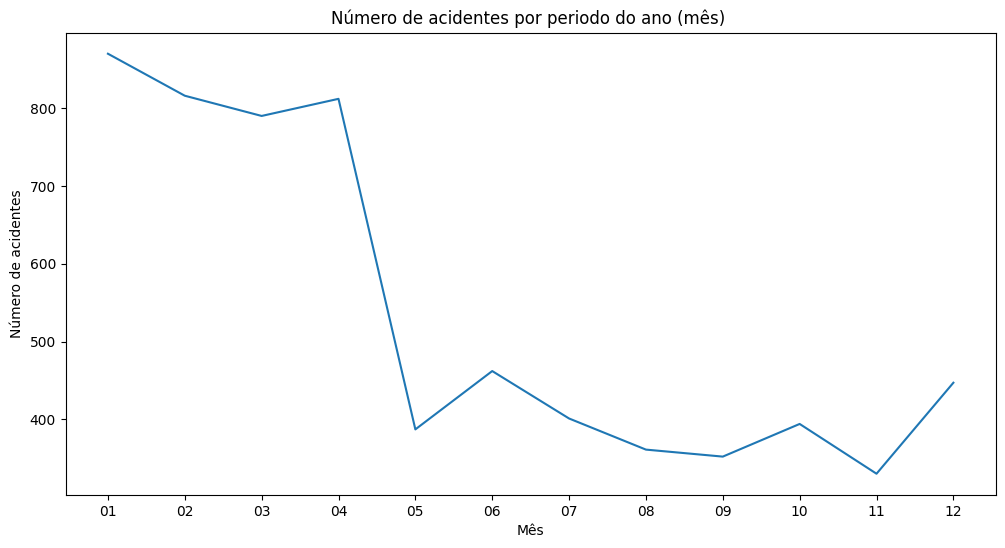

In [32]:
monthly_accidents = df['mes'].value_counts().sort_index()
plt.figure(figsize=(12, 6))  # Define o tamanho da figura
sns.lineplot(x=monthly_accidents.index.astype(str), y=monthly_accidents.values)

plt.xlabel('Mês')
plt.ylabel('Número de acidentes')
plt.title('Número de acidentes por periodo do ano (mês) ')
plt.savefig('idade_envolvidos_acidentes.png', dpi=300)

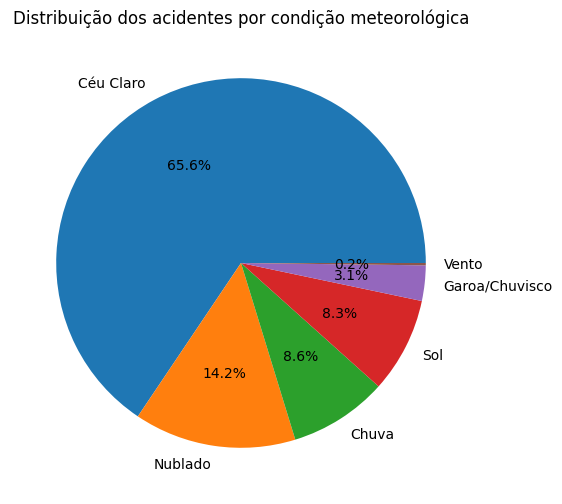

In [34]:
# Filtra os dados para remover a condição 'Ignorado'
df_filtered = df[df['condicao_metereologica'] != 'Ignorado']

# Conta o número de acidentes por condição meteorológica
weather_counts = df_filtered['condicao_metereologica'].value_counts()

# Cria um gráfico de pizza com a distribuição dos acidentes por condição meteorológica
plt.figure(figsize=(10,6))
plt.pie(weather_counts.values, labels=weather_counts.index, autopct='%1.1f%%')

plt.title('Distribuição dos acidentes por condição meteorológica')
plt.show()

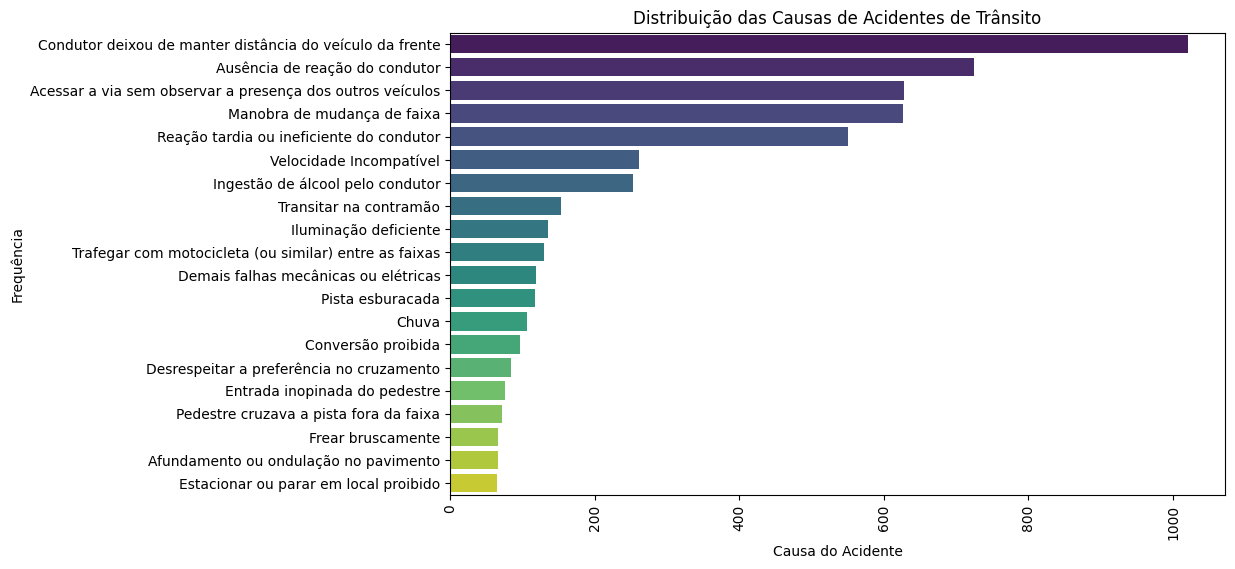

In [21]:
# Conta os top 20 acidentes por causa
reason_counts = df['causa_acidente'].value_counts().nlargest(20)


# Visualização - Gráfico de Barras
plt.figure(figsize=(10, 6))
sns.barplot(x=reason_counts.values, y=reason_counts.index, palette='viridis', hue=reason_counts.index, orient='h')
plt.title('Distribuição das Causas de Acidentes de Trânsito')
plt.xlabel('Causa do Acidente')
plt.ylabel('Frequência')
plt.xticks(rotation=90)
plt.show()

In [37]:

# Função para calcular a correlação entre variáveis categóricas
# Utilizando a medida de associação de Cramer
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


# Filtra as colunas categóricas
categorical_cols = df.select_dtypes(include=['object', 'period[M]'])

# Remove colunas que não são relevantes para a análise
categorical_cols = categorical_cols.drop([
    'data_inversa',
    'uf',
    'causa_principal',
    'latitude', 'longitude',
    'uop',
    'tipo_envolvido',
    'horario',
    'delegacia',
    'regional'], axis=1)

# Calcula a correlação entre as variáveis categóricas
correlation_matrix = categorical_cols.apply(lambda x : categorical_cols.apply(lambda y: cramers_v(x, y)))

# Plota um mapa de calor com a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação Categórica')
plt.show()

SyntaxError: invalid syntax (1802213737.py, line 24)